# Just In Time Trajectory

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
import numpy as np
from math import sqrt

0.3000|[0        250↗   500@4999  ↘250        0]
---
0.3000|[0        249↗   750@3750  ↘0       3750]
0.2531|[3750     109↗   641@5000  ↘250        0]
---
0.3000|[0        140↗   859@3819  ↘0       3819]
0.2531|[3819     104↗   896@3903  ↘0       3903]
0.2524|[3903      97↗   652@4999  ↘250        0]
---
0.3000|[0        145↗   854@3819  ↘0       3819]
0.2531|[3819       6↗   994@3951  ↘0       3951]
0.2524|[3951      93↗   656@4992  ↘249        0]
---
0.3000|[0        145↗   854@3819  ↘0       3819]
0.2531|[3819      10↗   990@3951  ↘0       3951]
0.2524|[3951      93↗   658@4992  ↘249        0]
---
0.3000|[0        145↗   854@3819  ↘0       3819]
0.2531|[3819      10↗   990@3951  ↘0       3951]
0.2524|[3951      93↗   658@4992  ↘249        0]
---


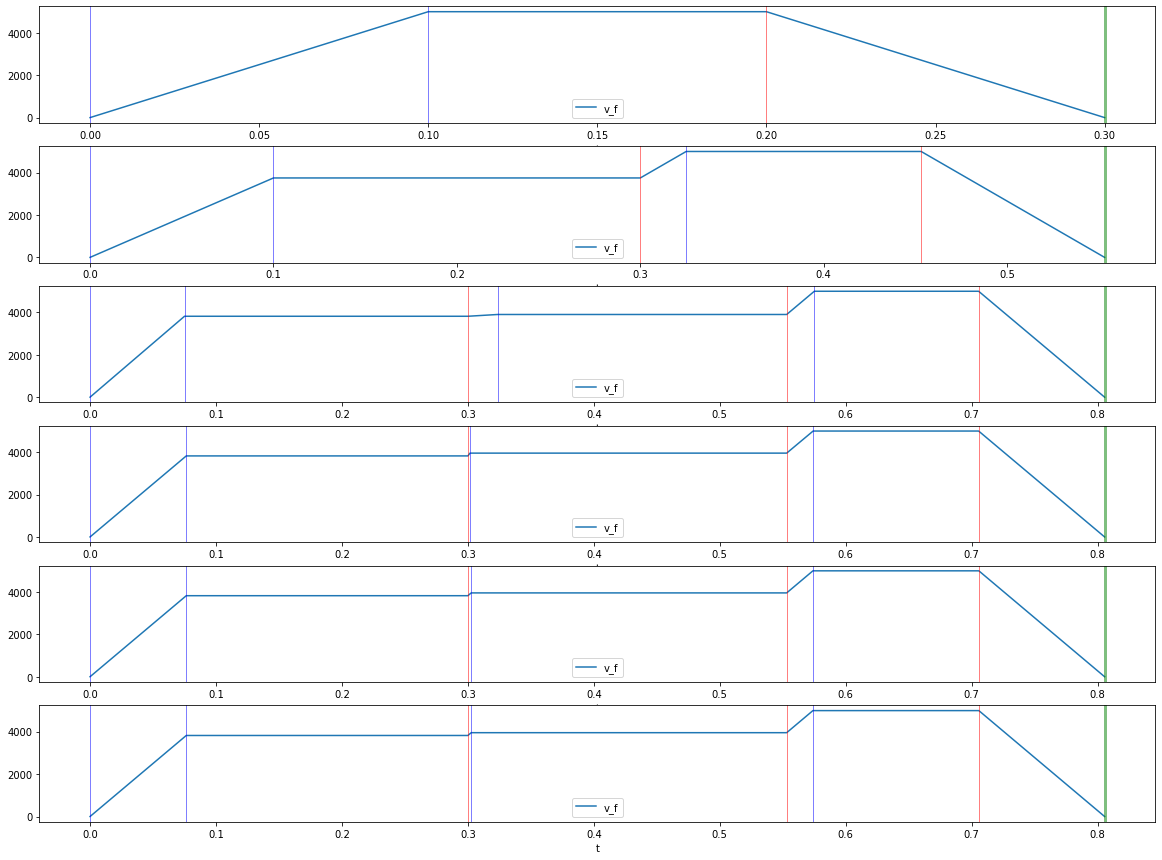

In [36]:

sl = SegmentList([Joint(5_000, 50_000)])

x = 1000

fig, axes = plt.subplots(6,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')

1.1000|[0        225↗  4774@4750  ↘0       4750] [0        225↗  4774@4750  ↘0       4750]
1.0501|[4750     224↗   275@286   ↘0        286] [4750       0↗  4999@4761  ↘0       4761]
1.0944|[286      249↗  4501@5000  ↘250        0] [4761       1↗  4770@4777  ↘228        0]


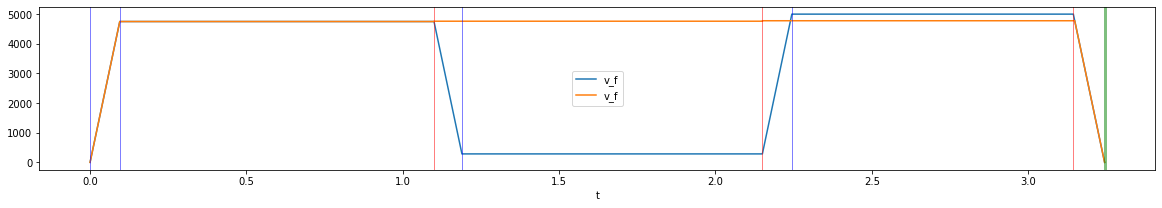

In [19]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x,x])
sl.rmove([x/10,x])
sl.rmove([x,x])

sl.update()

print(sl)
    
plot_segment_list(sl.dataframe)



1.1000|[0        225↗  4774@4750  ↘0       4750] [0        225↗  4774@4750  ↘0       4750]
1.0501|[4750      24↗  4976@4760  ↘0       4760] [4750      24↗  4976@4760  ↘0       4760]
1.0501|[4760      23↗  4727@5000  ↘250        0] [4760      23↗  4727@5000  ↘250        0]


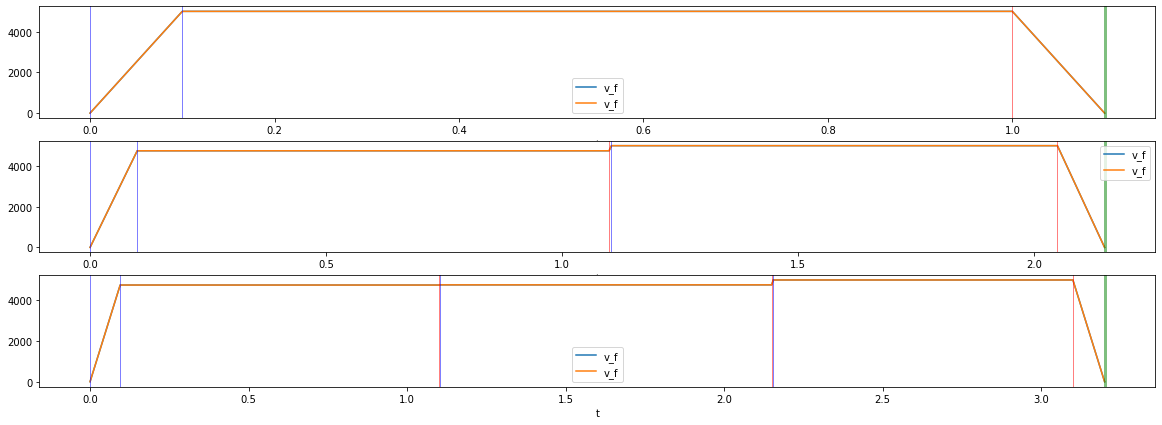

In [35]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(3,1, figsize=(20,7))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

print(sl)





1.1000|[0        250↗  4500@5000  ↘250        0] [0        225↗  4774@4750  ↘0       4750]
1.0501|[0          0↗     0@0     ↘0          0] [4750      24↗  4976@4760  ↘0       4760]
1.1000|[0        250↗  4500@5000  ↘250        0] [4760      23↗  4727@4749  ↘250        0]
0.0 1.1 [1.1, 1.1]
0.0 1.0501250000000002 [1.0501250000000002, 1.0501250000000002]
0.0 1.1 [1.1, 1.1]


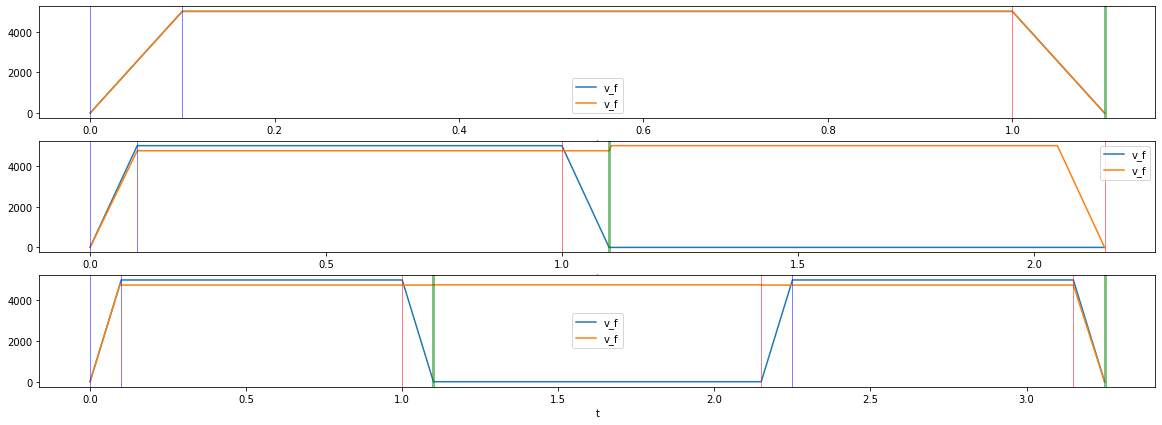

In [34]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(3,1, figsize=(20,7))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

print(sl)

for s in sl.segments:
    print(s.err_t, s.t, [js.t for js in s.joint_segments])


1.1000|[0        250↗  4500@5000  ↘250        0] [0        225↗  4774@4750  ↘0       4750]
1.1000|[0       -249↗ -4500@4999  ↘-249       0] [4750       0↗  4774@4750  ↘225        0]
1.1000|[0        250↗  4500@5000  ↘250        0] [0       -250↗ -4500@5000  ↘-250       0]
1.1000|[0       -250↗ -4500@5000  ↘-250       0] [0        225↗  4774@4750  ↘0       4750]
1.1000|[0        225↗  4774@4750  ↘0       4750] [4750      19↗  4981@4545  ↘0       4545]
1.0504|[4750       0↗  4999@4760  ↘0       4760] [4545      43↗  4707@4999  ↘249        0]
1.0501|[4760      23↗  4727@4999  ↘249        0] [0          0↗     0@0     ↘0          0]
1.1000|[0          0↗     0@0     ↘0          0] [0        250↗  4750@4750  ↘0       4750]
1.1000|[0        250↗  4500@5000  ↘250        0] [4750       0↗  4774@4750  ↘225        0]


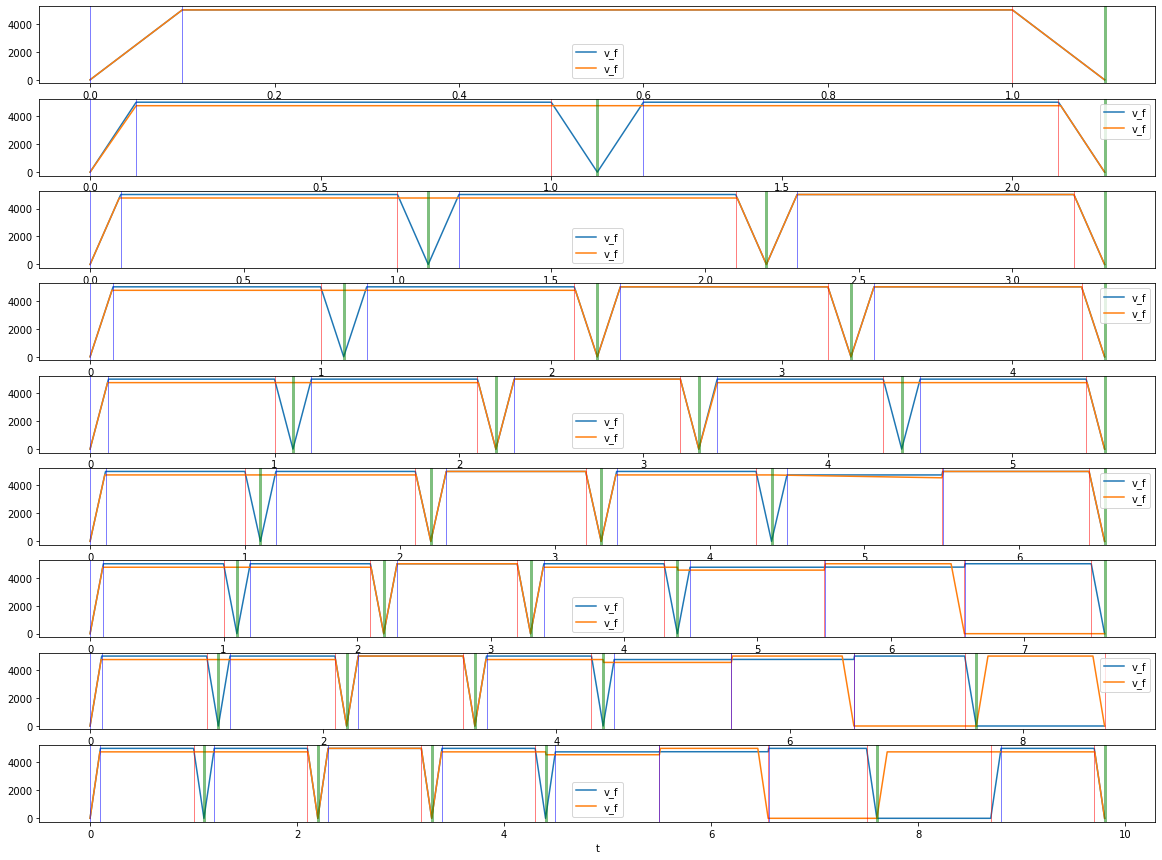

In [37]:

sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(9,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,-x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,0]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl)


In [8]:
sl.dataframe.set_index(['t','axis']).sort_index().reset_index()

,t,axis,x,v_i,v_f,ss,del_t
0,0.095012,1,226.0,0.00,4750.62,a,0.095012
1,0.100000,0,250.0,0.00,5000.00,a,0.100000
2,1.000000,0,4500.0,5000.00,5000.00,c,0.900000
3,1.100000,0,250.0,5000.00,0.00,d,0.100000
4,1.100000,1,4774.0,4750.62,4750.62,c,1.004988
5,1.200000,0,250.0,0.00,5000.00,a,0.100000
6,2.100000,0,4500.0,5000.00,5000.00,c,0.900000
7,2.104988,1,4774.0,4750.62,4750.62,c,1.004988
8,2.200000,1,226.0,4750.62,0.00,d,0.095012
9,2.200000,0,250.0,5000.00,0.00,d,0.100000


In [9]:
# a = 7550 passes, 7499 does not. 
sl = SegmentList([Joint(5_000, 7_499),Joint(5_000, 7_499)])

x = 5000

sl.rmove([x,x])
sl.rmove([-x,x])
sl.rmove([x,-x])
sl.rmove([-x,x])
sl.rmove([x,x])
for i in range(10):
    sl.update()
    print(round(sl.err_t,5), round(sum([s.err_t for s in sl.segments]), 5), [ (s.n_updates, s.err_t) for s in sl.segments])
    print('===')

plot_segment_list(sl.dataframe)

ZeroDivisionError: float division by zero

In [ ]:
print([s.err_t for s in sl.segments])

In [ ]:
sl.rmove([x,x])
sl.update()
sl.update() 
sl.update()
plot_segment_list(sl.dataframe)



In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 2000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])

for e in sl.segments:
    e.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])
sl.rmove([x,x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x, x])
sl.rmove([x/2, x])
sl.rmove([x, x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x, x])
sl.rmove([0, x])
sl.rmove([x, x])
sl.rmove([-x, x])
sl.rmove([x, x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
def max_v_0(x, a):
    """Return the maximum v_0 for a segment of distance x such that  we can
    decelerate and not exceede distance x"""

    # decel time t = v0/a
    # x = (v_i+v_f)/2 * t -> v0/2 * t
    # x = v0/2 * v0/a
    # x = v0^2/2a
    return sqrt(2 * a * x)

max_v_0(100,50_000)